In [1]:
!pip uninstall scipy

Uninstalling scipy-1.3.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/scipy-1.3.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.3.1


In [2]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 36.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [3]:
!git clone https://github.com/niazwazir/SRCNN_EXTENDED_PYTROCH.git

Cloning into 'SRCNN_EXTENDED_PYTROCH'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [4]:
cd SRCNN_EXTENDED_PYTROCH

/content/SRCNN_EXTENDED_PYTROCH


In [5]:
!ls

data_loader.py		model.py   Test.zip   utils.py
DRAW_SRCNN_MODEL.ipynb	solver.py  Train.zip


In [6]:
!unzip Test.zip

Archive:  Test.zip
   creating: Test/
   creating: Test/Set14/
  inflating: Test/Set14/baboon.bmp   
  inflating: Test/Set14/barbara.bmp  
  inflating: Test/Set14/bridge.bmp   
  inflating: Test/Set14/coastguard.bmp  
  inflating: Test/Set14/comic.bmp    
  inflating: Test/Set14/face.bmp     
  inflating: Test/Set14/flowers.bmp  
  inflating: Test/Set14/foreman.bmp  
  inflating: Test/Set14/lenna.bmp    
  inflating: Test/Set14/man.bmp      
  inflating: Test/Set14/monarch.bmp  
  inflating: Test/Set14/pepper.bmp   
  inflating: Test/Set14/ppt3.bmp     
  inflating: Test/Set14/zebra.bmp    
   creating: Test/Set5/
  inflating: Test/Set5/baby_GT.bmp   
  inflating: Test/Set5/bird_GT.bmp   
  inflating: Test/Set5/butterfly_GT.bmp  
  inflating: Test/Set5/head_GT.bmp   
  inflating: Test/Set5/woman_GT.bmp  


In [7]:
!unzip Train.zip

Archive:  Train.zip
   creating: Train/
  inflating: Train/t1.bmp            
  inflating: Train/t10.bmp           
  inflating: Train/t11.bmp           
  inflating: Train/t12.bmp           
  inflating: Train/t13.bmp           
  inflating: Train/t14.bmp           
  inflating: Train/t15.bmp           
  inflating: Train/t16.bmp           
  inflating: Train/t17.bmp           
  inflating: Train/t18.bmp           
  inflating: Train/t19.bmp           
  inflating: Train/t2.bmp            
  inflating: Train/t20.bmp           
  inflating: Train/t21.bmp           
  inflating: Train/t22.bmp           
  inflating: Train/t23.bmp           
  inflating: Train/t24.bmp           
  inflating: Train/t25.bmp           
  inflating: Train/t26.bmp           
  inflating: Train/t27.bmp           
  inflating: Train/t28.bmp           
  inflating: Train/t29.bmp           
  inflating: Train/t3.bmp            
  inflating: Train/t30.bmp           
  inflating: Train/t31.bmp           
  inflatin

In [8]:
!pip install torchviz

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=47306e01935bc9596b37e6951a3e29f2f18deeb651e8f2c5506f066492f4813a
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [0]:
import torch
from torch import nn
from solver import train
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from data_loader import SRCNN_dataset
from torchviz import make_dot, make_dot_from_trace

In [0]:
class SRCNN(nn.Module):
    """
    Model for SRCNN

    Input -> Conv1 -> Relu -> Conv2 -> Relu -> Conv3 -> MSE
    
    Args:
        - C1, C2, C3: num output channels for Conv1, Conv2, and Conv3
        - F1, F2, F3: filter size
    """
    def __init__(self,
                 C1=64, C2=32, C3=1,
                 F1=9, F2=1, F3=5):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 9) # in, out, kernel
        self.conv2 = nn.Conv2d(64, 16, 1)
        self.conv3 = nn.Conv2d(16, 32, 1)
        self.conv4 = nn.Conv2d(32, 32, 1)
        self.conv5 = nn.Conv2d(32, 32, 1)
        self.conv6 = nn.Conv2d(32, 1, 5)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.conv6(x)
        return x

model = SRCNN()

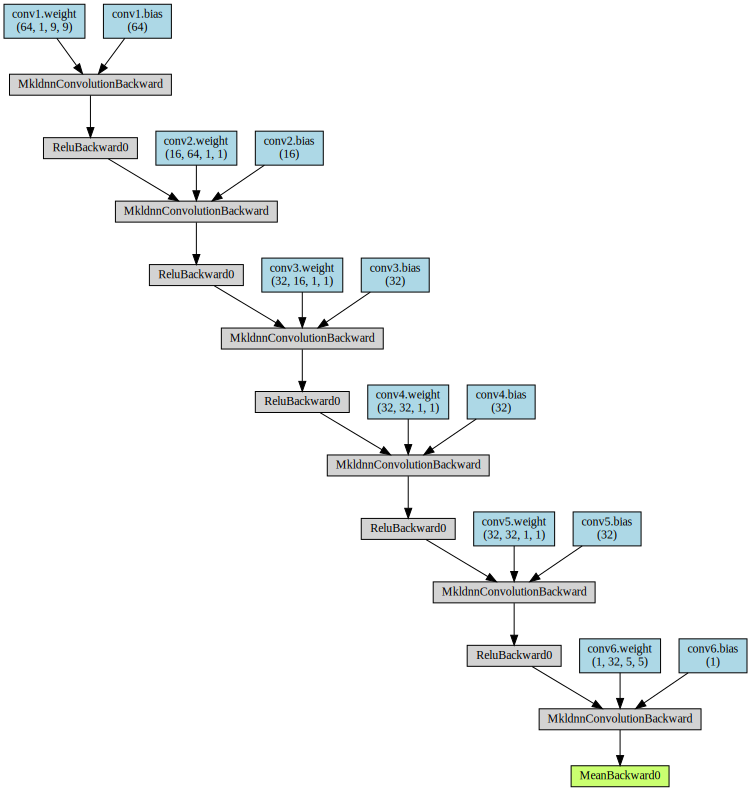

In [13]:
x = Variable(torch.randn(1,1,33,33))
y = model(x)
make_dot(y.mean(),params=dict(model.named_parameters()))

In [0]:
import torch
from torch import nn
from torchsummary import summary

In [11]:
%matplotlib inline
train_config = { 'dir_path': 'Train', 'scale': 3, 'is_gray': True, 'input_size': 33, 'label_size': 21, 'stride': 21 }
test_config = train_config.copy()
test_config['dir_path'] = 'Test/Set5'

train_dataset = SRCNN_dataset(train_config)
model = SRCNN()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
model = train(train_dataset, model, loss_fn, optimizer, num_epochs=1, batch_size=128)

Epoch 1, iter     0, loss 0.31298
Epoch 1, iter    10, loss 0.26264
Epoch 1, iter    20, loss 0.25078
Epoch 1, iter    30, loss 0.20013
Epoch 1, iter    40, loss 0.18614
Epoch 1, iter    50, loss 0.15017
Epoch 1, iter    60, loss 0.13484
Epoch 1, iter    70, loss 0.11954


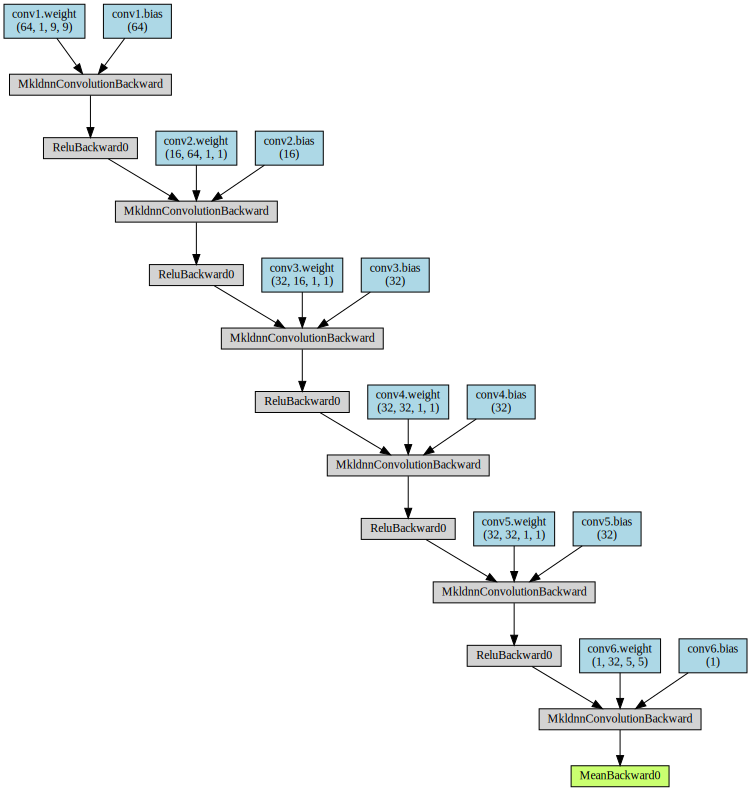

In [12]:
x = Variable(torch.randn(1,1,33,33))
y = model(x)
make_dot(y.mean(),params=dict(model.named_parameters()))